In [ ]:
from google.colab import drive
drive.mount("/content/drive") 

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/FIRE/train.csv')
model_dir = '/content/drive/MyDrive/FIRE/'

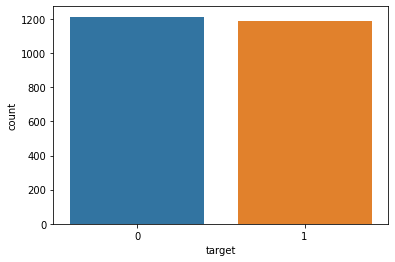

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df) 

In [ ]:
train_tweets = df['tweet'].tolist()
train_labels = df['target'].tolist()

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 33.7 MB/s 
     |████████████████████████████████| 636 kB 44.1 MB/s 
     |████████████████████████████████| 895 kB 40.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer 
tokenizer1 = AutoTokenizer.from_pretrained("urduhack/roberta-urdu-small")
tokenizer2 = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
tokenizer3 = AutoTokenizer.from_pretrained("xlm-roberta-base")



Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/516 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
train_encodings1 = tokenizer1(train_tweets, truncation=True, padding=True)
train_encodings2 = tokenizer2(train_tweets, truncation=True, padding=True)
train_encodings3 = tokenizer3(train_tweets, truncation=True, padding=True)

# val_encodings1 = tokenizer1(val_tweets, truncation=True, padding=True)
# val_encodings2 = tokenizer2(val_tweets, truncation=True, padding=True)
# val_encodings3 = tokenizer3(val_tweets, truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
import torch

class tweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset1 = tweetDataset(train_encodings1, train_labels)
train_dataset2 = tweetDataset(train_encodings2, train_labels)
train_dataset3 = tweetDataset(train_encodings3, train_labels)




In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("urduhack/roberta-urdu-small")
model2 = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased")
model3 = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base")

Downloading:   0%|          | 0.00/507M [00:00<?, ?B/s]

Some weights of the model checkpoint at urduhack/roberta-urdu-small were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at urduhack/roberta-urdu-small and are new

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

In [ ]:
from transformers import Trainer, TrainingArguments

trainer1 = Trainer(
    model=model1,
    train_dataset=train_dataset1
)

setattr(trainer1.args, 'learning_rate', 1.97615e-05)
setattr(trainer1.args, 'num_train_epochs' ,2)
setattr(trainer1.args, 'per_device_train_batch_size' , 16)
setattr(trainer1.args, 'evaluation_strategy' , 'epoch')

trainer1.train()

trainer2 = Trainer(
    model=model2,
    train_dataset=train_dataset2

)

setattr(trainer2.args, 'learning_rate', 8.152843673110737e-06)
setattr(trainer2.args, 'num_train_epochs' ,2)
setattr(trainer2.args, 'per_device_train_batch_size' , 4)
setattr(trainer2.args, 'evaluation_strategy' , 'epoch')
trainer2.train()

trainer3 = Trainer(
    model=model3,
    train_dataset=train_dataset3
)

setattr(trainer3.args, 'learning_rate', 2.0941182421473606e-05)
setattr(trainer3.args, 'num_train_epochs' ,2)
setattr(trainer3.args, 'per_device_train_batch_size' , 8)
setattr(trainer3.args, 'evaluation_strategy' , 'epoch')
trainer3.train()



***** Running training *****
  Num examples = 2400
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 300


Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 2400
  Num Epochs = 2
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 1200


Step,Training Loss,Validation Loss


Saving model checkpoint to tmp_trainer/checkpoint-500
Configuration saved in tmp_trainer/checkpoint-500/config.json
Model weights saved in tmp_trainer/checkpoint-500/pytorch_model.bin
Saving model checkpoint to tmp_trainer/checkpoint-1000
Configuration saved in tmp_trainer/checkpoint-1000/config.json
Model weights saved in tmp_trainer/checkpoint-1000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 2400
  Num Epochs = 2
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  G

Step,Training Loss,Validation Loss


Saving model checkpoint to tmp_trainer/checkpoint-500
Configuration saved in tmp_trainer/checkpoint-500/config.json
Model weights saved in tmp_trainer/checkpoint-500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=600, training_loss=0.4968474833170573, metrics={'train_runtime': 261.5772, 'train_samples_per_second': 18.35, 'train_steps_per_second': 2.294, 'total_flos': 145533302496000.0, 'train_loss': 0.4968474833170573, 'epoch': 2.0})

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/FIRE/test.csv')
test_tweets=df_test['tweet'].tolist()

In [ ]:
test_encodings1 = tokenizer1(test_tweets, truncation=True, padding=True)
test_encodings2 = tokenizer2(test_tweets, truncation=True, padding=True)
test_encodings3 = tokenizer3(test_tweets, truncation=True, padding=True)

class testDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return 1100

test_dataset1 = testDataset(test_encodings1)
test_dataset2 = testDataset(test_encodings2)
test_dataset3 = testDataset(test_encodings3)


In [ ]:
predictions1 = trainer1.predict(test_dataset1)
predictions2 = trainer2.predict(test_dataset2)
predictions3 = trainer3.predict(test_dataset3)


***** Running Prediction *****
  Num examples = 1100
  Batch size = 8


***** Running Prediction *****
  Num examples = 1100
  Batch size = 8


***** Running Prediction *****
  Num examples = 1100
  Batch size = 8


In [ ]:
avg=np.average([predictions1.predictions[:,1],predictions2.predictions[:,1],predictions3.predictions[:,1]],axis=0)
sVoting=avg.copy()
sVoting[sVoting>=0]=1
sVoting[sVoting<0]=0

In [ ]:
sub_df=df_test['id'].copy()
submission=pd.concat([sub_df,pd.DataFrame(sVoting)],axis=1)
submission = submission.rename(columns={0:"target"})
submission=pd.concat([submission,pd.DataFrame(avg)],axis=1)
submission = submission.rename(columns={0:"score"})
submission.to_csv('/content/drive/MyDrive/FIRE/Soft-Voting.csv',index=False)

In [ ]:
df_result=pd.read_csv('/content/drive/MyDrive/FIRE/Soft-Voting.csv')

In [ ]:
print(f1_score(test_labels, df_result['target'], average='weighted'), roc_auc_score(test_labels, df_result['score']))

0.8642367940385295 0.9360667612649712
